## Importing all the required Library

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,Rescaling

from keras import optimizers

plt.rcParams.update({'font.size': 14})


### Loading the data

In [2]:
!gdown 11LQILlalZGi_skLIipnpTyh-At77B_j6

Downloading...
From: https://drive.google.com/uc?id=11LQILlalZGi_skLIipnpTyh-At77B_j6
To: /content/New_landmark_images.zip
100% 112M/112M [00:01<00:00, 66.3MB/s] 


In [3]:
!unzip New_landmark_images.zip

Archive:  New_landmark_images.zip
   creating: New_landmark_images/
   creating: New_landmark_images/train/
   creating: New_landmark_images/train/01.Niagara_Falls/
  inflating: New_landmark_images/train/01.Niagara_Falls/176bf33159dd4780.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/43e7e6b715dea27a.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/4a18c9d51c84df27.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/032a10a9b60eae53.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/519776646d035f06.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/6a6cd26155db4327.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/7a1ddf7a6ae3436d.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/7398dbeba39b5fb7.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/54be916f53092ef8.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/292419d3147c4a34.jpg  
  inflating: New_landmark_images/train/01.Nia

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory('New_landmark_images/train',shuffle =True, seed=123,image_size=(227, 227),batch_size=32)
test_data = tf.keras.utils.image_dataset_from_directory('New_landmark_images/test',shuffle =True, seed=123,image_size=(227, 227),batch_size=32)
val_data = tf.keras.utils.image_dataset_from_directory('New_landmark_images/validation',shuffle =True, seed=123,image_size=(227, 227),batch_size=32)

Found 737 files belonging to 10 classes.
Found 43 files belonging to 10 classes.
Found 155 files belonging to 10 classes.


In [5]:
data_preprocess = Sequential(
    name = 'data_preprocess',
    layers = [Rescaling(1.0/255)]
)

In [6]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

In [8]:
train_data.class_names

['01.Niagara_Falls',
 '02.Golden_Gate_Bridge',
 '03.Kantanagar_Temple',
 '04.Eiffel_Tower',
 '05.Washington_Monument',
 '06.Hanging_Temple',
 '07.Forth_Bridge',
 '08.Gateway_of_India',
 '09.Machu_Picchu',
 '10.Great_Wall_of_China']

In [9]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## VGG

In [10]:
BATCH_SIZE = 128
tf.random.set_seed(10)
np.random.seed(10)
train_ds = tf.keras.utils.image_dataset_from_directory("New_landmark_images/train/",shuffle =True, seed=123,image_size=(224, 224),batch_size=BATCH_SIZE)
val_ds   = tf.keras.utils.image_dataset_from_directory("New_landmark_images/validation/",shuffle =False, seed=123,image_size=(224, 224),batch_size=BATCH_SIZE)
test_ds = tf.keras.utils.image_dataset_from_directory("New_landmark_images/test/",shuffle =False, seed=123,image_size=(224, 224),batch_size=BATCH_SIZE)


data_preprocess = tf.keras.Sequential(
    name="data_preprocess",
    layers=[Rescaling(1.0/255),]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_ds.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_ds.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_ds.map(lambda x, y: (data_preprocess(x), y))

Found 737 files belonging to 10 classes.
Found 155 files belonging to 10 classes.
Found 43 files belonging to 10 classes.


In [11]:
## VGG Model

vgg16_model = Sequential(
    name = 'vgg16_model',
    layers = [tf.keras.layers.Input(shape = (224,224,3)),
              tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
              tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
              tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'),


              tf.keras.layers.Conv2D(128, kernel_size = (3,3), padding = 'same', activation = 'relu'),
              tf.keras.layers.Conv2D(128, kernel_size = (3,3), padding = 'same', activation = 'relu'),
              tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'),

              tf.keras.layers.Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'),
              tf.keras.layers.Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'),
              tf.keras.layers.Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'),
              tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'),


              tf.keras.layers.Conv2D(512, kernel_size = (3,3), padding = 'same', activation = 'relu'),
              tf.keras.layers.Conv2D(512, kernel_size = (3,3), padding = 'same', activation = 'relu'),
              tf.keras.layers.Conv2D(512, kernel_size = (3,3), padding = 'same', activation = 'relu'),
              tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'),

              tf.keras.layers.Conv2D(512, kernel_size = (3,3), padding = 'same', activation = 'relu'),
              tf.keras.layers.Conv2D(512, kernel_size = (3,3), padding = 'same', activation = 'relu'),
              tf.keras.layers.Conv2D(512, kernel_size = (3,3), padding = 'same', activation = 'relu'),
              tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'),

              
              tf.keras.layers.Flatten(),
              #tf.keras.layers.Dense(4096, activation= 'relu'),
              #tf.keras.layers.Dropout(0.5),
              #tf.keras.layers.Dense(4096, activation= 'relu'),
              #tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(10, activation= 'softmax')  
    ]
    
)

In [12]:
vgg16_model.summary()

Model: "vgg16_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                   

In [13]:
import functools

top5_acc = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())


opt = optimizers.SGD(learning_rate = 0.005, momentum = 0.99)

vgg16_model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
print(vgg16_model.optimizer.get_config())


history = vgg16_model.fit(train_ds,  epochs=5,validation_data=val_ds)

{'name': 'SGD', 'learning_rate': 0.005, 'decay': 0.0, 'momentum': 0.99, 'nesterov': False}
Epoch 1/5
6/6 [==============================] - 103s 10s/step - loss: 2.3025 - accuracy: 0.1045 - val_loss: 2.3025 - val_accuracy: 0.1226
Epoch 2/5
6/6 [==============================] - 13s 2s/step - loss: 2.3016 - accuracy: 0.1289 - val_loss: 2.3024 - val_accuracy: 0.1032
Epoch 3/5
6/6 [==============================] - 14s 2s/step - loss: 2.2998 - accuracy: 0.1194 - val_loss: 2.3026 - val_accuracy: 0.1032
Epoch 4/5
6/6 [==============================] - 14s 2s/step - loss: 2.2978 - accuracy: 0.1194 - val_loss: 2.3032 - val_accuracy: 0.1032
Epoch 5/5
6/6 [==============================] - 14s 2s/step - loss: 2.2962 - accuracy: 0.1194 - val_loss: 2.3047 - val_accuracy: 0.1032


In [15]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

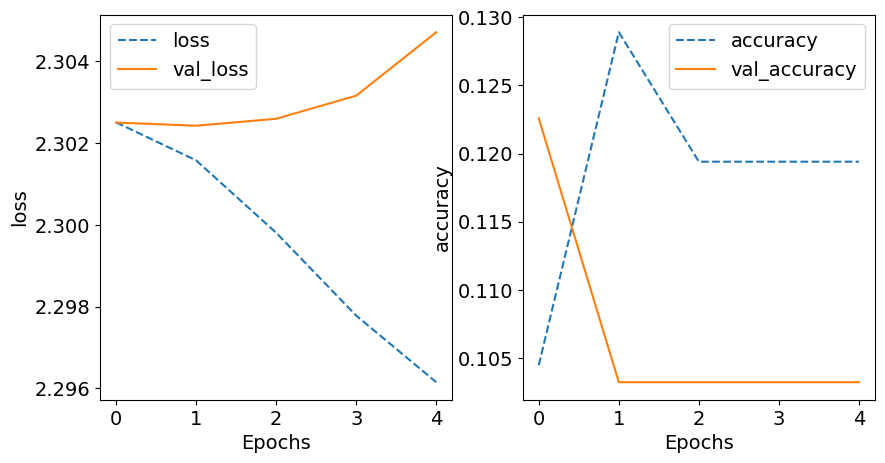

In [16]:
training_plot(['loss', 'accuracy'], history)

In [17]:
def plot_image(pred_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)


1/1 [==============================] - 0s 166ms/step


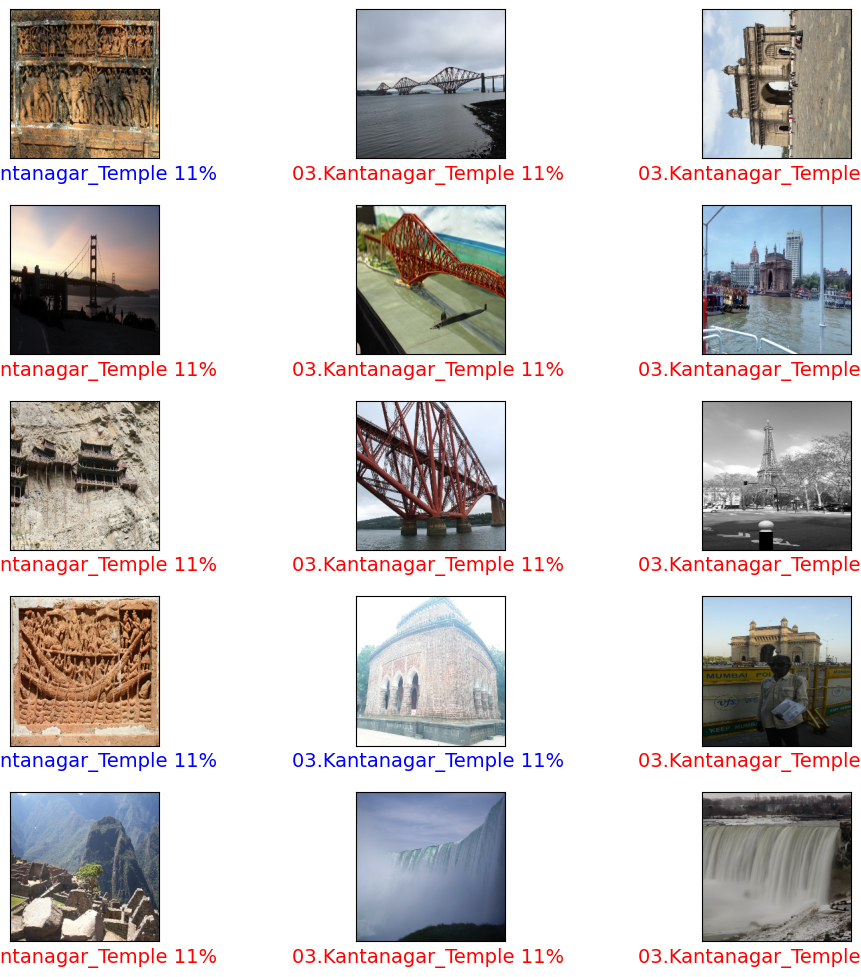

In [20]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = vgg16_model.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 15)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()